In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="darkgrid")

### Criação de analise de frequência

In [3]:
file_name = './dataset/tabela_frequencia.csv'

In [4]:
df = pd.read_csv(file_name, sep=';', index_col=0)
df.head()

,País de Origem
Indivíduo,
1,Brasil
2,Inglaterra
3,Japão
4,EUA
5,Brasil


In [5]:
# Frequência absoluta
tabela_frequencia = df['País de Origem'].value_counts().reset_index()
tabela_frequencia.columns = ['País de Origem', 'Frequência Absoluta']

# Frequência relativa
tabela_frequencia['Frequência Relativa'] = tabela_frequencia['Frequência Absoluta'] / df.shape[0]

# Frequência acumulada
tabela_frequencia['Frequência Acumulada'] = tabela_frequencia['Frequência Absoluta'].cumsum()

# Frequência relativa acumulada
tabela_frequencia['Frequência Relativa Acumulada'] = tabela_frequencia['Frequência Relativa'].cumsum()

# Ordenar por país de origem
#tabela_frequencia.sort_values(by='País de Origem', ascending=False, inplace=True)

# Adicionar linha de soma
soma = pd.DataFrame({
    'País de Origem': ['Total'],
    'Frequência Absoluta': [tabela_frequencia['Frequência Absoluta'].sum()],
    'Frequência Relativa': [tabela_frequencia['Frequência Relativa'].sum()],
    'Frequência Acumulada': [tabela_frequencia['Frequência Acumulada'].iloc[-1]],
    'Frequência Relativa Acumulada': [tabela_frequencia['Frequência Relativa Acumulada'].iloc[-1]]
})
tabela_frequencia = pd.concat([tabela_frequencia, soma])

tabela_frequencia

,País de Origem,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Relativa Acumulada
0,Brasil,59,0.196667,59,0.196667
1,EUA,35,0.116667,94,0.313333
2,Índia,19,0.063333,113,0.376667
3,China,18,0.060000,131,0.436667
4,Uruguai,17,0.056667,148,0.493333
5,Japão,16,0.053333,164,0.546667
6,Austrália,15,0.050000,179,0.596667
7,África do Sul,14,0.046667,193,0.643333
8,Rússia,14,0.046667,207,0.690000
9,Inglaterra,12,0.040000,219,0.730000


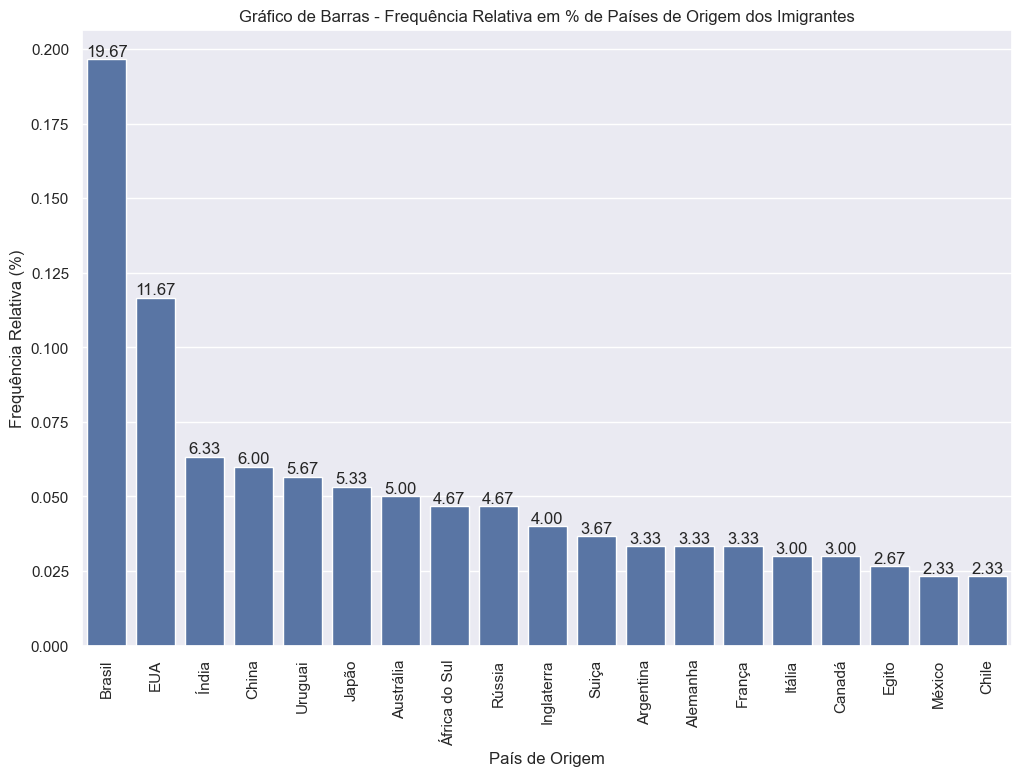

In [6]:
# Remover a linha com o valor "Total"
tabela_frequencia_sem_total = tabela_frequencia[tabela_frequencia['País de Origem'] != 'Total']

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=tabela_frequencia_sem_total, x='País de Origem', y='Frequência Relativa')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.annotate(f'{y * 100:.2f}', (x, y), ha='center', va='bottom')

# Configurar o título e os rótulos dos eixos
plt.title('Gráfico de Barras - Frequência Relativa em % de Países de Origem dos Imigrantes')
plt.xlabel('País de Origem')
plt.xticks(rotation=90)
plt.ylabel('Frequência Relativa (%)')

# Exibir o gráfico
plt.show()


#### Analise Descritivas & Quantitativas

In [7]:
file_name = './dataset/observacao_precos.csv'

In [8]:
df = pd.read_csv(file_name, sep=';', index_col=0)
df['Preço ($)'] = df['Preço ($)'].str.replace(',', '.').astype(float)
df.head()

,Preço ($)
Nº Observação,
1,189.0
2,195.0
3,199.0
4,189.0
5,197.0


In [9]:
df_describe = df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
Preço ($),100.0,190.77,15.621052,149.0,179.0,189.0,199.0,239.0


In [10]:
# Calculate additional metrics
df_describe['Amplitude'] = df['Preço ($)'].max() - df['Preço ($)'].min()
df_describe['Variância'] = df['Preço ($)'].var()
df_describe['Erro Padrão'] =  df['Preço ($)'].std() / np.sqrt(len(df['Preço ($)']))
df_describe['Coeficiente de Variação'] = df['Preço ($)'].std() / df['Preço ($)'].mean()
df_describe['Coeficiente de Assimetria'] = df['Preço ($)'].skew()
df_describe['Coeficiente de Curtose'] = df['Preço ($)'].kurtosis()

df_describe.T


,Preço ($)
count,100.000000
mean,190.770000
std,15.621052
min,149.000000
25%,179.000000
50%,189.000000
75%,199.000000
max,239.000000
Amplitude,90.000000
Variância,244.017273


### Associção Qui²

In [11]:
file_name = './dataset/associacao_qui2.csv'

Processo manual para validar a associação com base no qui²

In [12]:
df = pd.read_csv(file_name, sep=';')
df.head()

,Operadora,Baixo,Médio,Alto
0,Total Health,40,16,12
1,Viva Vida,32,24,16
2,Mena Saúde,24,32,4


In [13]:
df['Total'] = df[df.columns[1:4]].sum(axis=1)
df

,Operadora,Baixo,Médio,Alto,Total
0,Total Health,40,16,12,68
1,Viva Vida,32,24,16,72
2,Mena Saúde,24,32,4,60


In [14]:
df_frequencia = pd.DataFrame()
df_frequencia['Operadora'] = df['Operadora']

for column in df.columns[1:4]:
    df_frequencia[column] = (df['Total'] * df[column].sum()) / df['Total'].sum()
df_frequencia

,Operadora,Baixo,Médio,Alto
0,Total Health,32.64,24.48,10.88
1,Viva Vida,34.56,25.92,11.52
2,Mena Saúde,28.80,21.60,9.60


In [15]:
df_residuos = pd.DataFrame()
df_residuos['Operadora'] = df['Operadora']
for column in df.columns[1:4]:
    df_residuos[column] = df[column] - df_frequencia[column]
df_residuos

,Operadora,Baixo,Médio,Alto
0,Total Health,7.36,-8.48,1.12
1,Viva Vida,-2.56,-1.92,4.48
2,Mena Saúde,-4.80,10.40,-5.60


In [16]:
df_x2 = pd.DataFrame()
df_x2['Operadora'] = df['Operadora']
for column in df.columns[1:4]:
    df_x2[column] = df_residuos[column] ** 2 / df_frequencia[column]
df_x2

,Operadora,Baixo,Médio,Alto
0,Total Health,1.659608,2.937516,0.115294
1,Viva Vida,0.189630,0.142222,1.742222
2,Mena Saúde,0.800000,5.007407,3.266667


In [17]:
x2_total = df_x2[df.columns[1:4]].sum().sum()
x2_total

15.860566448801741

In [18]:
# Graus de liberdade
shape = df.drop(columns=['Operadora', 'Total']).shape
freedom_ = (shape[1] - 1) * (shape[0] - 1)

# Valor p
p_value = stats.chi2.sf(x2_total, freedom_)

p_value

0.003212084698153722

In [19]:
critical_value = stats.chi2.ppf(0.95, freedom_)
critical_value

9.487729036781154

Processo automatizado

In [20]:
# Create a contingency table
contingency_table = df[['Baixo', 'Médio', 'Alto']].values

# Perform the chi-square test
chi2_value, p_value, degree_freedom, _ = stats.chi2_contingency(contingency_table)
critical_value = stats.chi2.ppf(0.95, int(degree_freedom))

# Print the results
print("Chi-square statistic:", chi2_value)
print("p-value:", p_value)
print("degree freedom:", degree_freedom)
print("critical value:", critical_value)
print("Conclusão: ", "Rejeitar H0" if chi2_value > critical_value else "Aceitar H0")


Chi-square statistic: 15.860566448801741
p-value: 0.003212084698153722
degree freedom: 4
critical value: 9.487729036781154
Conclusão:  Rejeitar H0


### Correlação de Person

In [21]:
file_name = './dataset/notas_provas.csv'

In [22]:
df = pd.read_csv(file_name, sep=';')
df.head()

,Nota Matemática,Nota Física,Nota Literatura
0,"5,50","7,50","9,00"
1,"9,00","8,50","5,50"
2,"4,50","5,00","6,50"
3,"6,50","8,00","6,50"
4,"7,50","6,00","5,00"


In [23]:
for column in df.columns:
    df[column] = df[column].apply(lambda x: x.replace('.', '').replace(',', '.')).astype(float)
df.head()

,Nota Matemática,Nota Física,Nota Literatura
0,5.5,7.5,9.0
1,9.0,8.5,5.5
2,4.5,5.0,6.5
3,6.5,8.0,6.5
4,7.5,6.0,5.0


In [24]:
corrs = []
for i, column in enumerate(df.columns):
    if i == len(df.columns) - 1:
        break
    for j in range(i+1, len(df.columns)):
        corr, p_value = stats.pearsonr(df[column], df[df.columns[j]])
        corrs.append(dict(
            feature1=column,
            feature2=df.columns[j],
            corr=corr,
            p_value=p_value
        ))
df_corrs = pd.DataFrame(corrs)
df_corrs

,feature1,feature2,corr,p_value
0,Nota Matemática,Nota Física,0.602532,0.000426
1,Nota Matemática,Nota Literatura,-0.308783,0.096862
2,Nota Física,Nota Literatura,-0.289561,0.120647


In [26]:
results = []
for item in df_corrs.itertuples():
    feature1 = item.feature1
    feature2 = item.feature2
    corr = item.corr
    p_value = item.p_value

    critical_value = stats.t.ppf(1-(0.05 / 2), df.shape[0] - 2)
    results.append(dict(
        feature1=feature1,
        feature2=feature2,
        corr=corr,
        p_value=p_value,
        critical_value=critical_value,
        reject_null=p_value < 0.05
    ))
df_results = pd.DataFrame(results)
df_results

,feature1,feature2,corr,p_value,critical_value,reject_null
0,Nota Matemática,Nota Física,0.602532,0.000426,2.048407,True
1,Nota Matemática,Nota Literatura,-0.308783,0.096862,2.048407,False
2,Nota Física,Nota Literatura,-0.289561,0.120647,2.048407,False


### Funções Principais:

1. **Cumulative Distribution Function (CDF)**:
   - Descrição: Retorna a probabilidade acumulada de que a variável aleatória seja menor ou igual a um determinado valor.
   - Utilização: Amplamente utilizada para calcular probabilidades acumuladas.
   - Distribuições: Todas as distribuições de probabilidade.
   - Exemplo:
     ```python
     import scipy.stats as stats

     # Calculando a probabilidade acumulada para a distribuição t
     p_value = stats.t.cdf(t_value, degrees_of_freedom)
     ```

2. **Survival Function (SF)**:
   - Descrição: Retorna o complemento da função de distribuição acumulada (CDF), ou seja, a probabilidade de que a variável aleatória seja maior que um determinado valor.
   - Utilização: Útil para calcular a probabilidade da cauda direita da distribuição.
   - Distribuições: Todas as distribuições de probabilidade.
   - Exemplo:
     ```python
     import scipy.stats as stats

     # Calculando a probabilidade da cauda direita para a distribuição t
     p_value = stats.t.sf(t_value, degrees_of_freedom)
     ```

3. **Percent Point Function (PPF)**:
   - Descrição: Retorna o valor correspondente a uma determinada probabilidade acumulada.
   - Utilização: Útil para encontrar percentis ou valores críticos.
   - Distribuições: Todas as distribuições de probabilidade.
   - Exemplo:
     ```python
     import scipy.stats as stats

     # Encontrando o valor correspondente a uma probabilidade acumulada para a distribuição t
     t_value = stats.t.ppf(0.95, degrees_of_freedom)
     ```

4. **Probability Density Function (PDF)**:
   - Descrição: Retorna a densidade de probabilidade em um ponto específico da distribuição.
   - Utilização: Útil para entender a distribuição da probabilidade ao longo do suporte da distribuição.
   - Distribuições: Todas as distribuições de probabilidade contínuas.
   - Exemplo:
     ```python
     import scipy.stats as stats

     # Calculando a densidade de probabilidade para a distribuição normal
     pdf_value = stats.norm.pdf(x, mean, std_dev)
     ```

### Exemplos para as Principais Distribuições:

1. **Distribuição t**:
   ```python
   import scipy.stats as stats

   # Parâmetros da distribuição t
   t_value = 2.5
   degrees_of_freedom = 10

   # Exemplo de uso da função sf para calcular P(T > 2.5)
   p_value = stats.t.sf(t_value, degrees_of_freedom)
   ```
2. **Distribuição Qui-quadrado**
   ```python
   import scipy.stats as stats

   # Parâmetros da distribuição qui-quadrado
   chi2_value = 10
   degrees_of_freedom = 5

   # Exemplo de uso da função cdf para calcular P(X < 10)
   p_value = stats.chi2.cdf(chi2_value, degrees_of_freedom)
   ```

3. **Distribuição Normal**
   ```python
   import scipy.stats as stats

   # Parâmetros da distribuição normal
   x = 0
   mean = 0
   std_dev = 1

   # Exemplo de uso da função pdf para calcular a densidade de probabilidade em x
   pdf_value = stats.norm.pdf(x, mean, std_dev)
   ```

4. **Distribuição F**
   ```python
   import scipy.stats as stats

   # Parâmetros da distribuição F
   f_value = 2.0
   dfn = 5
   dfd = 10

   # Exemplo de uso da função sf para calcular P(F > 2.0)
   p_value = stats.f.sf(f_value, dfn, dfd)
   ```




### Distribuição Binomial

Utilizado para variaveis categoricas univariada.

Quantidade de vezes que desejo SUCESSO em um numero de repeticação X à uma probabilidade p.

In [29]:
# Set the parameters for the binomial distribution

n = 12  # Number of trials
p = 0.065  # Probability of success

stats.binom.pmf(2, n, p)


0.1423923827895976

In [30]:
k = list(range(0, 13))
k

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [31]:
probs = [stats.binom.pmf(i, n, p) for i in k]
probs

[0.44641556695081935,
 0.3724108472958708,
 0.1423923827895976,
 0.03299645233983542,
 0.005161209791124005,
 0.000574081089066199,
 4.6560943943871765e-05,
 2.7744489133857887e-06,
 1.2054757979283177e-07,
 3.7245835705450086e-09,
 7.767848088302421e-11,
 9.818378721237882e-13,
 5.688009063105716e-15]

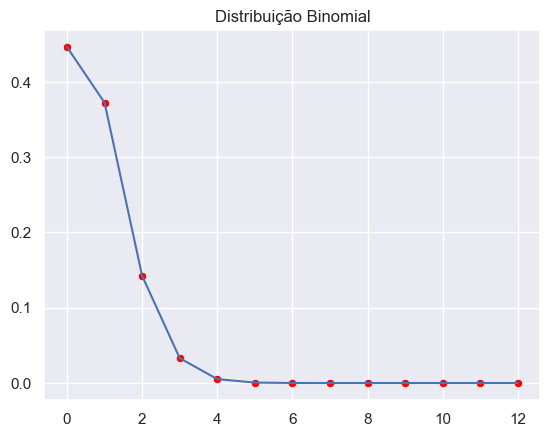

In [32]:
plt.title('Distribuição Binomial')
sns.lineplot(x=k, y=probs)
sns.scatterplot(x=k, y=probs, color='red')
plt.show()

### Distribuição Binomial Negativa

Utilizado para variaveis categoricas univariada.

Descobrir a probabilidade de ocorrer X vezes um evento em N tentativas com uma probabilidade p de sucesso

In [34]:
# Parameters for the negative binomial distribution
p = .11 # Probabilidade de sucesso
x = 10 # Numero de Tentativas
k = 3 # Numero de sucessos
p_value = stats.nbinom.pmf(x-k, k, p)

print("P-value:", p_value)


P-value: 0.021193886428541676


In [35]:
x = list(range(1, 21)) # Quantidade de tentativas
k = 2 # Numero de sucessos
p = 0.4 # Probabilidade de sucesso

In [36]:
probs = [stats.nbinom.pmf((i-k), k, p) for i in x]
probs

[0.0,
 0.16000000000000003,
 0.19200000000000006,
 0.17279999999999998,
 0.13824,
 0.10368000000000004,
 0.07464960000000004,
 0.05225472000000001,
 0.03583180799999999,
 0.024186470400000003,
 0.01612431359999999,
 0.010642046975999998,
 0.0069657034752,
 0.0045277072588800005,
 0.0029255954595840006,
 0.0018807399383040059,
 0.0012036735605145594,
 0.0007673418948280315,
 0.00048748779200839663,
 0.00030874226827198485]

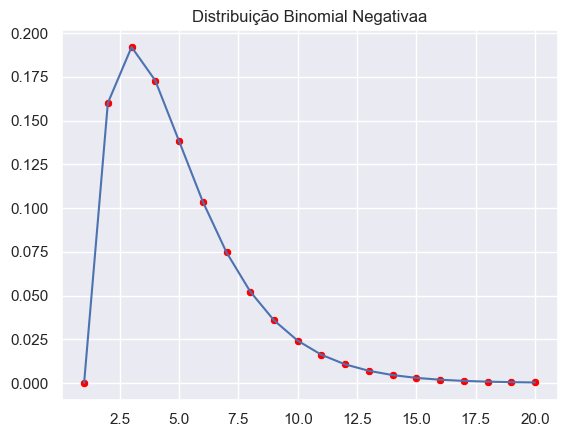

In [37]:
plt.title('Distribuição Binomial Negativaa')
sns.lineplot(x=x, y=probs)
sns.scatterplot(x=x, y=probs, color='red')
plt.show()

### Distribuição de Poisson

A distribuição de Poisson é uma distribuição de probabilidade discreta que descreve o número de eventos que ocorrem em um intervalo de tempo ou espaço fixo, quando esses eventos ocorrem de forma independente e em uma taxa média conhecida. Ela é utilizada quando estamos interessados em modelar a ocorrência de eventos raros em um determinado período de tempo ou espaço, como o número de chamadas recebidas em um call center em um determinado intervalo de tempo, o número de acidentes de trânsito em uma determinada região em um dia, entre outros. A distribuição de Poisson é caracterizada por ter uma média e uma variância iguais, e é amplamente utilizada em estatística, teoria das filas, engenharia, entre outras áreas.


In [38]:
# Parameters for the Poisson distribution
mu = 2 # Taxa de ocorrencia ao longo do tempo (período)
k = 3 # Número de sucessos
p_value = stats.poisson.pmf(k, mu)
p_value

0.18044704431548356

In [39]:
k = list(range(0, 11))
probs = [stats.poisson.pmf(i, mu) for i in k]
probs

[0.1353352832366127,
 0.2706705664732254,
 0.2706705664732254,
 0.18044704431548356,
 0.09022352215774178,
 0.03608940886309672,
 0.012029802954365565,
 0.0034370865583901616,
 0.0008592716395975402,
 0.00019094925324389823,
 3.818985064877954e-05]

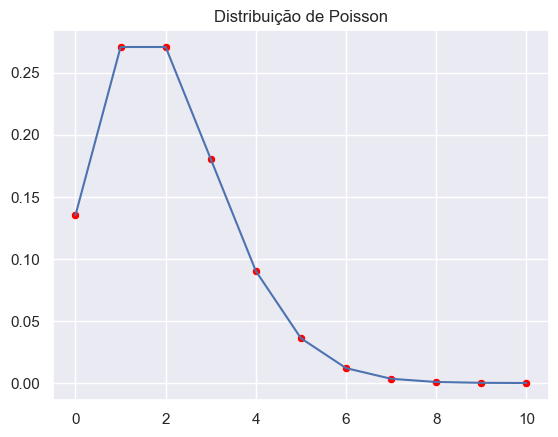

In [40]:
plt.title('Distribuição de Poisson')
sns.lineplot(x=k, y=probs)
sns.scatterplot(x=k, y=probs, color='red')
plt.show()

### Distribuição Normal

Aplicada á valores quantitativos.

A distribuição normal, também conhecida como distribuição de Gauss ou distribuição em forma de sino, é uma das distribuições de probabilidade mais importantes na estatística. Ela é caracterizada por sua forma simétrica em torno de um valor médio e sua curva suave.

A distribuição normal é amplamente utilizada em análises estatísticas devido a suas propriedades matemáticas e sua aplicabilidade em muitos fenômenos naturais e sociais. Ela é frequentemente utilizada em situações em que os dados seguem uma distribuição aproximadamente simétrica em torno de um valor médio.

Alguns exemplos de quando a distribuição normal é utilizada incluem:

1. Modelagem de dados: A distribuição normal é frequentemente utilizada para modelar dados contínuos, como altura, peso, tempo de reação, entre outros.

2. Testes de hipóteses: Muitos testes estatísticos, como o teste t de Student e o teste de ANOVA, assumem que os dados seguem uma distribuição normal para realizar inferências estatísticas.

3. Estimativa de parâmetros: A distribuição normal é utilizada em técnicas de estimativa de parâmetros, como a regressão linear, para estimar os coeficientes do modelo.

4. Controle de qualidade: Em processos de controle de qualidade, a distribuição normal é frequentemente utilizada para determinar limites de controle e identificar desvios significativos.

É importante ressaltar que nem todos os dados seguem uma distribuição normal. Em alguns casos, é necessário realizar transformações nos dados ou utilizar outras distribuições estatísticas adequadas para analisar os dados de forma correta.


* model.cdf: Função acumulada

* model.pdf: Função de ponto

In [41]:
# Parameters for the normal distribution
mean = 0.028
std = 0.012
x = 0.03 # < 0.03

# Score Z
z_score = (x - mean) / std
print('Z score: ', z_score)

# Calculate the probability of a value being less than 0.03
p_value = stats.norm.cdf(0.03, loc=mean, scale=std)
print('p-value: ', p_value)

Z score:  0.16666666666666652
p-value:  0.5661838326109035


In [42]:
zs = np.arange(-5, 5 , 0.1)
zs

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [44]:
probs = [stats.norm.pdf(z, loc=0, scale=1) for z in zs]
probs

[1.4867195147342979e-06,
 2.438960745893352e-06,
 3.961299091032062e-06,
 6.369825178867069e-06,
 1.014085206548667e-05,
 1.5983741106905332e-05,
 2.4942471290053356e-05,
 3.853519674208672e-05,
 5.8943067756539116e-05,
 8.926165717713167e-05,
 0.00013383022576488347,
 0.00019865547139276957,
 0.00029194692579145534,
 0.0004247802705507443,
 0.0006119019301137612,
 0.0008726826950457439,
 0.0012322191684729959,
 0.0017225689390536463,
 0.0023840882014647936,
 0.0032668190561998523,
 0.004431848411937913,
 0.005952532419775727,
 0.007915451582979793,
 0.010420934814422364,
 0.013582969233685318,
 0.017528300493568152,
 0.022394530294842407,
 0.028327037741600544,
 0.03547459284623067,
 0.043983595980426234,
 0.05399096651318691,
 0.06561581477467522,
 0.07895015830089255,
 0.09404907737688507,
 0.11092083467945342,
 0.12951759566588933,
 0.1497274656357422,
 0.17136859204780444,
 0.19418605498320982,
 0.21785217703254722,
 0.24197072451913992,
 0.2660852498987513,
 0.28969155276147934,


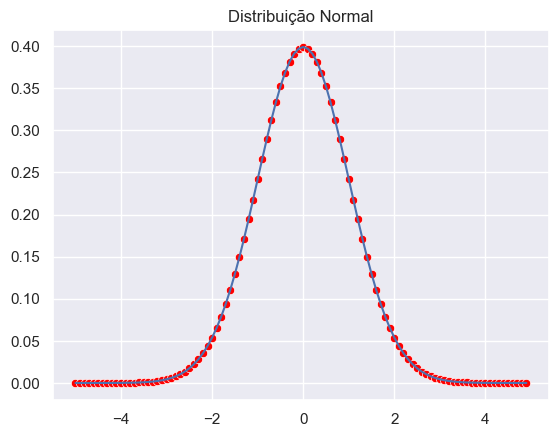

In [45]:
plt.title('Distribuição Normal')
sns.lineplot(x=zs, y=probs)
sns.scatterplot(x=zs, y=probs, color='red')
plt.show()

#### Distribuição Qui-Quadrado

O teste da distribuição qui-quadrado é um teste estatístico utilizado para verificar se uma determinada amostra de dados segue uma distribuição específica. Ele compara a frequência observada dos dados em diferentes categorias com a frequência esperada, assumindo que os dados seguem a distribuição teórica. O teste calcula uma estatística qui-quadrado, que é comparada com um valor crítico para determinar se há uma diferença significativa entre a distribuição observada e a esperada. Se a estatística qui-quadrado for maior que o valor crítico, rejeita-se a hipótese nula de que os dados seguem a distribuição teórica. Caso contrário, não há evidências suficientes para rejeitar a hipótese nula.


In [46]:
# Parameters for the chi-square distribution
df = 7 # Graus de liberdade
x = 6 # Valor de X

1 - stats.chi2.cdf(x, df) # P(X > 6)

0.5397493503955573

In [47]:
x = 8 # Valor de X
stats.chi2.cdf(x, df) # P(X < 8)

0.6674060974006919

In [48]:
p = 0.05 # Probabilidade > 0.05
stats.chi2.ppf(1-p, df) # Valor de X

14.067140449340167

In [49]:
p = 0.90 # Probabilidade < 0.90
stats.chi2.ppf(p, df) # Valor de X

12.017036623780532

In [50]:
xs = np.arange(0, 20, 0.5)
probs = [stats.chi2.pdf(x, df) for x in xs]
probs

[0.0,
 0.0036615940788976894,
 0.01613138163460956,
 0.03461992263122744,
 0.05534766632274598,
 0.07530099694507554,
 0.0925081978822616,
 0.10591892743038007,
 0.11518072856146785,
 0.1204169178389248,
 0.12204152134938738,
 0.12061899490769887,
 0.11676521599113947,
 0.11108236874967568,
 0.10411977480817192,
 0.09635353622267297,
 0.08817913751079275,
 0.07991247341496056,
 0.07179594427339576,
 0.06400722970955498,
 0.056669110683469005,
 0.04985928249426107,
 0.04361951869511298,
 0.03796384020340716,
 0.032885544001058496,
 0.02836307591605092,
 0.024364811465178746,
 0.02085285268449675,
 0.017785968656399264,
 0.015121811446552873,
 0.012818533423821174,
 0.010835920683646251,
 0.009136143412216174,
 0.007684209407492476,
 0.006448192795576982,
 0.005399296930288103,
 0.004511798883074631,
 0.0037629129375096873,
 0.0031326020735592533,
 0.002603359453790747]

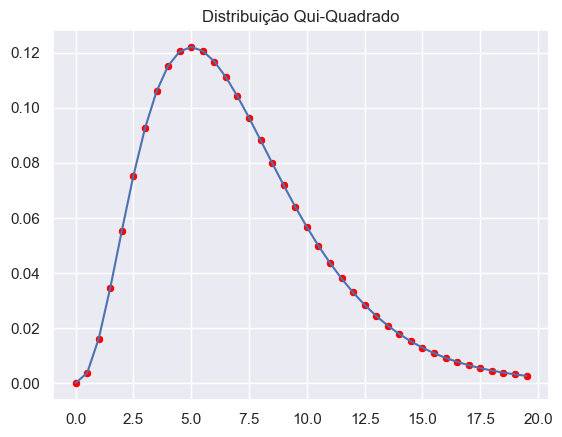

In [51]:
plt.title('Distribuição Qui-Quadrado')
sns.lineplot(x=xs, y=probs)
sns.scatterplot(x=xs, y=probs, color='red')
plt.show()

### Distribuição T student

A distribuição t, também conhecida como distribuição t de Student, é usada em inferência estatística para fazer testes de hipóteses e construir intervalos de confiança para a média de uma população quando o tamanho da amostra é pequeno e a variância populacional é desconhecida. Ela é mais robusta que a distribuição normal em amostras pequenas, sendo útil quando a normalidade não pode ser assumida.

In [52]:
# P > 2.5
t_value = 2.5
degrees_of_freedom = 7

# Calculando o valor DIST.T.CD
p_value = stats.t.sf(t_value, degrees_of_freedom)

# Imprimindo o resultado
print(f'O valor DIST.T.CD para t = {t_value} e df = {degrees_of_freedom} é {p_value * 100}')

O valor DIST.T.CD para t = 2.5 e df = 7 é 2.049610929287643


In [53]:
# P < -2.5
stats.t.pdf(-2.5, degree_freedom) * 100

3.567562436955665

In [54]:
# P -1 
stats.t.cdf(-1, 7) * 100

17.530833141010373

In [55]:
#P 2
stats.t.cdf(2, 7) * 100

95.71903357185121

In [56]:
# P(-1T<2)
(stats.t.cdf(2, degree_freedom) - stats.t.cdf(-1, degree_freedom))

0.7549912550915627

In [57]:
# P = 5%
stats.t.isf(0.05, degree_freedom)

2.13184678632665

In [58]:
xs = np.arange(-5, 5, 0.1)
xs

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [59]:
probs = [stats.t.pdf(x, degree_freedom) for x in xs]
probs

[0.0026496362165572204,
 0.002890004200519079,
 0.0031562000899559087,
 0.003451405988416136,
 0.0037792415796244192,
 0.004143829603691243,
 0.004549871695936847,
 0.00500273625547623,
 0.005508560263465342,
 0.006074367252022263,
 0.006708203932499346,
 0.007419298321105969,
 0.008218242541312742,
 0.009117203819542808,
 0.010130167496884236,
 0.011273216114143378,
 0.012564848729606035,
 0.014026344509659354,
 0.015682174165287773,
 0.017560461814839515,
 0.019693498090836377,
 0.02211830244527351,
 0.02487722820542586,
 0.028018597422759747,
 0.03159734322613456,
 0.03567562436955626,
 0.04032335895494781,
 0.0456186008491911,
 0.051647652126003585,
 0.05850476733409643,
 0.06629126073623794,
 0.07511377763138313,
 0.08508143977371978,
 0.09630153093199355,
 0.10887336538560828,
 0.12287999999999819,
 0.13837753713555045,
 0.15538195452212428,
 0.17385372358466658,
 0.19368096389490927,
 0.2146625258399768,
 0.23649314409302186,
 0.2587535367731627,
 0.2809088317119477,
 0.30231870

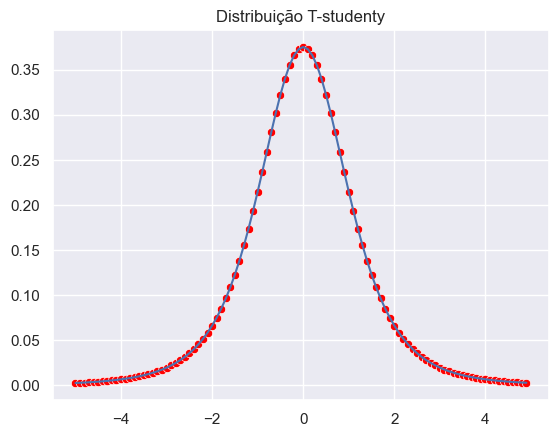

In [60]:
plt.title('Distribuição T-studenty')
sns.lineplot(x=xs, y=probs)
sns.scatterplot(x=xs, y=probs, color='red')
plt.show()

#### Distribuição F Snedecor

A distribuição F é utilizada em estatística para testar a igualdade de variâncias entre dois grupos ou para comparar a variabilidade entre dois ou mais grupos. É comumente aplicada em análises de variância (ANOVA) e em testes de regressão. A distribuição F é uma distribuição contínua e positiva, que é assimétrica e possui duas variáveis de graus de liberdade: um para o numerador e outro para o denominador. É particularmente útil em situações onde é necessário comparar a variabilidade entre grupos, como em estudos experimentais ou observacionais.

In [61]:
degree_freedom_numerator = 17
degree_freedom_denominator = 28

In [62]:
# P (X > 1.5)
stats.f.sf(1.5, degree_freedom_numerator, degree_freedom_denominator) * 100

16.605717926271108

In [63]:
# P (X<1)
stats.f.cdf(1.0, degree_freedom_numerator, degree_freedom_denominator) * 100

51.42237972801842

In [64]:
# P (2 < X < 3)
(stats.f.cdf(3.0, degree_freedom_numerator, degree_freedom_denominator) - stats.f.cdf(2.0, degree_freedom_numerator, degree_freedom_denominator)) * 100

4.549975118639882

In [65]:
# X = P(X > x) = 5%
stats.f.pdf(5.0, degree_freedom_numerator, degree_freedom_denominator) * 100

0.015946002000155834

#### Testes Z Média

### Teste Z para Médias:

Um teste Z para médias é uma técnica estatística utilizada para testar a diferença entre as médias de duas amostras independentes, assumindo que as populações subjacentes tenham distribuições normais e que as variâncias populacionais sejam conhecidas.

#### Passos do Teste Z para Médias:

1. **Formulação das Hipóteses**:
   - Hipótese Nula (H0): As médias das duas populações são iguais.
   - Hipótese Alternativa (H1): As médias das duas populações são diferentes.

2. **Cálculo da Estatística de Teste**:
   - A estatística de teste Z é calculada como a diferença entre as médias das amostras dividida pela raiz quadrada da soma das variâncias das amostras, ajustada pelo tamanho das amostras.
   - **Fórmula**:
     ![Formula](https://latex.codecogs.com/svg.latex?Z%20%3D%20%5Cfrac%7B%5Cbar%7BX%7D_1%20-%20%5Cbar%7BX%7D_2%7D%7B%5Csqrt%7B%5Cfrac%7B%5Csigma_1%5E2%7D%7Bn_1%7D%20&plus;%20%5Cfrac%7B%5Csigma_2%5E2%7D%7Bn_2%7D%7D%7D)
   - Onde:
   
     - \(\bar{X}_1\) e \(\bar{X}_2\) são as médias das amostras.
     - \(\sigma_1^2\) e \(\sigma_2^2\) são as variâncias populacionais.
     - \(n_1\) e \(n_2\) são os tamanhos das amostras.
     

3. **Decisão Estatística**:
   - Compara-se o valor da estatística de teste Z calculada com o valor crítico Z obtido a partir da distribuição normal padrão.
   - Se o valor absoluto da estatística de teste Z for maior do que o valor crítico Z para um determinado nível de significância (geralmente 0,05 ou 0,01), rejeita-se a hipótese nula em favor da hipótese alternativa.

4. **Interpretação dos Resultados**:
   - Se a hipótese nula for rejeitada, conclui-se que há evidências estatísticas suficientes para afirmar que as médias das duas populações são diferentes.
   - Se a hipótese nula não for rejeitada, não há evidências suficientes para afirmar que as médias das duas populações são diferentes.

#### Observações Importantes:
- O teste Z para médias é apropriado quando as amostras são grandes (geralmente \(n \geq 30\)) e as variâncias populacionais são conhecidas.
- Se as variâncias populacionais forem desconhecidas, é mais apropriado usar o teste t de Student.
- É importante verificar se as suposições subjacentes ao teste Z são atendidas antes de interpretar os resultados.

O teste Z para médias é uma ferramenta valiosa na análise estatística para comparar médias de duas amostras independentes quando as condições apropriadas são atendidas.

In [115]:
# Geração de dados de exemplo para duas amostras
np.random.seed(0)
X_mean = 100.00
std = 12.0

x_mean = 104.08

statistic_z = (x_mean-X_mean)/(std/np.sqrt(40))
p_value = stats.norm.sf(statistic_z)
# Exibição dos resultados
print("Estatística do teste Z:", statistic_z)
print("Valor p:", p_value)

# Decisão estatística com nível de significância de 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. As médias das duas amostras são diferentes.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que as médias das duas amostras são diferentes.")


Estatística do teste Z: 2.1503488089144973
Valor p: 0.015763817155860158
Rejeitamos a hipótese nula. As médias das duas amostras são diferentes.


In [116]:
xs = np.arange(-5, 5, 0.1)
probs = [stats.norm.pdf(x) for x in xs]

In [117]:
# Percentil de 95%
critical_value = stats.norm.ppf(0.95)
critical_value

1.6448536269514722

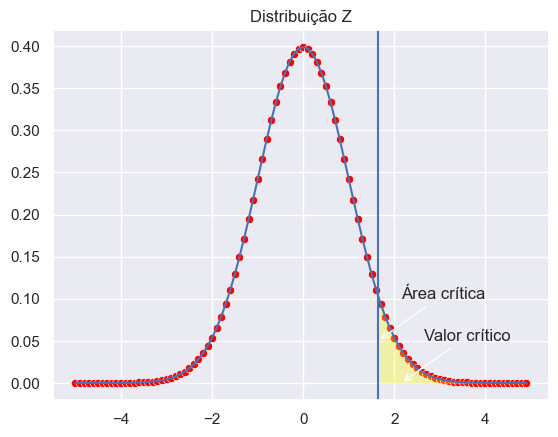

In [123]:
plt.title('Distribuição Z')
sns.lineplot(x=xs, y=probs)
sns.scatterplot(x=xs, y=probs, color='red')
plt.axvline(critical_value)
plt.fill_between(xs, probs, where=(xs > critical_value), color='yellow', alpha=0.3)
plt.annotate('Área crítica', xy=(critical_value, 0.05), xytext=(critical_value+0.5, 0.10), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Valor crítico', xy=(statistic_z, 0.00), xytext=(statistic_z+0.5, 0.05), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

#### Teste T para médias

Um teste t para médias é uma técnica estatística utilizada para testar a diferença entre as médias de duas amostras independentes ou para determinar se a média de uma única amostra difere de um valor de referência, quando o desvio padrão populacional é desconhecido. Este teste é uma extensão do teste z quando o tamanho da amostra é pequeno ou a variância populacional é desconhecida.

### Passos do Teste t para Médias:

1. **Formulação das Hipóteses**:
   - Hipótese Nula (\(H_0\)): As médias das duas amostras (ou a média da amostra única e a média de referência) são iguais.
   - Hipótese Alternativa (\(H_1\)): As médias das duas amostras (ou a média da amostra única e a média de referência) são diferentes.

2. **Cálculo da Estatística de Teste**:
   - A estatística de teste t é calculada como a diferença entre as médias das amostras dividida pelo erro padrão da diferença entre as médias.
   - **Fórmula para amostras independentes**:
     \[t = \frac{(\bar{X}_1 - \bar{X}_2)}{\sqrt{\frac{{s_1^2}}{{n_1}} + \frac{{s_2^2}}{{n_2}}}}\]
   - **Fórmula para uma amostra**:
     \[t = \frac{(\bar{X} - \mu_0)}{\frac{{s}}{{\sqrt{n}}}}\]
   - Onde:
     - \(\bar{X}_1\) e \(\bar{X}_2\) são as médias das amostras.
     - \(s_1\) e \(s_2\) são os desvios padrão das amostras.
     - \(n_1\) e \(n_2\) são os tamanhos das amostras.
     - \(\bar{X}\) é a média da amostra única.
     - \(\mu_0\) é o valor de referência (para o teste de uma amostra).
     - \(s\) é o desvio padrão da amostra única.

3. **Decisão Estatística**:
   - Compara-se o valor da estatística de teste t calculada com o valor crítico t obtido a partir da distribuição t-Student.
   - Se o valor absoluto da estatística de teste t for maior do que o valor crítico t para um determinado nível de significância (geralmente 0,05 ou 0,01), rejeita-se a hipótese nula em favor da hipótese alternativa.

4. **Interpretação dos Resultados**:
   - Se a hipótese nula for rejeitada, conclui-se que há evidências estatísticas suficientes para afirmar que as médias das duas amostras (ou a média da amostra única) diferem significativamente.
   - Se a hipótese nula não for rejeitada, não há evidências suficientes para afirmar que as médias das duas amostras (ou a média da amostra única) diferem significativamente.

### Observações Importantes:
- O teste t para médias é apropriado para amostras pequenas (geralmente \(n < 30\)) ou quando o desvio padrão populacional é desconhecido.
- Existem diferentes versões do teste t, dependendo das características dos dados, como igualdade ou desigualdade das variâncias entre as amostras (teste t de Student ou teste t de Welch, respectivamente).
- A interpretação dos resultados do teste t depende da validade das suposições subjacentes, como a normalidade dos dados e a independência das observações.

In [137]:
degree_freedom = 24
size = 25
mean = 16.808
std = 2.733

X_mean = 18.0

In [138]:
statistic_t = (mean-X_mean)/(std/np.sqrt(size))
statistic_t

-2.1807537504573733

In [139]:
p_value = stats.t.cdf(statistic_t, degree_freedom)
p_value

0.019617183706940388

In [150]:
# Valor critico de 1%
critical_value = stats.t.ppf(0.01, degree_freedom)
critical_value

-2.4921594731575762

In [147]:
xs = np.arange(-5, 5, 0.1)
probs = [stats.t.pdf(x, degree_freedom) for x in xs]

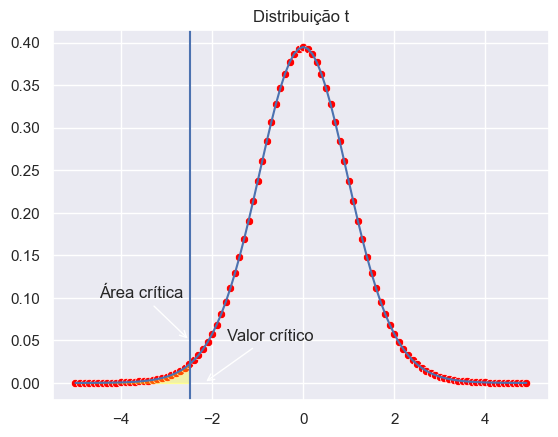

In [158]:
plt.title('Distribuição t')
sns.lineplot(x=xs, y=probs)
sns.scatterplot(x=xs, y=probs, color='red')
plt.axvline(critical_value)
plt.fill_between(xs, probs, where=(xs < critical_value), color='yellow', alpha=0.3)
plt.annotate('Área crítica', xy=(critical_value, 0.05), xytext=(critical_value-2, 0.10), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Valor crítico', xy=(statistic_t, 0.00), xytext=(statistic_t+0.5, 0.05), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()